In [ ]:
Off-Platform Project: Viral Tweets
In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

The total number of tweets in the dataset.
The columns, or features, of the dataset.
The text of the first tweet in the dataset.
Some of these features are dictionaries. For example, the feature "user" is a dictionary. We might want to use some of the information found in these sub-dictionaries. Print all_tweets.loc[0]["user"] to see what the "user" feature looks like.

After printing that, try printing just the "location" found in that "user" dictionary. For example, all_tweets.loc[0]["user"]["screen_name"] would give you only the screen name associated with the first tweet.

In [2]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print (all_tweets.loc[0]["user"])
print (all_tweets.loc[0]["user"]["screen_name"])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_cou

In [5]:
import numpy as np

median_retweets = all_tweets["retweet_count"].median()
print(median_retweets)
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

13.0
0    5562
1    5537
Name: is_viral, dtype: int64


In [10]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

all_tweets['hashtags_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
all_tweets['links_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
all_tweets['words_count'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)
all_tweets['avg_count'] = all_tweets.apply(lambda tweet: np.average(tweet['words_count']), axis=1)

In [12]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count']]
scaled_data = scale(data, axis=0)
print(scaled_data)

[[ 0.6164054  -0.02878298 -0.14483305]
 [-1.64577622 -0.02886246 -0.16209787]
 [ 0.6164054  -0.02887736 -0.11566596]
 ...
 [ 0.6164054  -0.02918038 -0.1768776 ]
 [ 0.6164054  -0.02955792 -0.14679496]
 [-1.71759151 -0.02208668  0.0333085 ]]


In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.5581081081081081


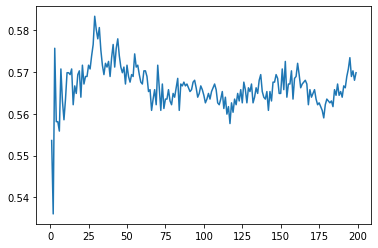

In [18]:
import matplotlib.pyplot as plt

scores = []
for k in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(1,200), scores)
plt.show()